In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.shape

(1460, 81)

In [8]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
to_be_removed = train_data.isnull().sum().sort_values(ascending = False) > 1
to_be_removed = pd.DataFrame({'features':to_be_removed.index, 'isNull':to_be_removed.values})
to_be_removed = list(to_be_removed[to_be_removed['isNull'] == True].features.values)
to_be_removed

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

In [10]:
to_be_removed.remove('BsmtQual')

In [11]:
to_be_removed

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'MasVnrArea',
 'MasVnrType']

In [12]:
train_data.shape

(1460, 81)

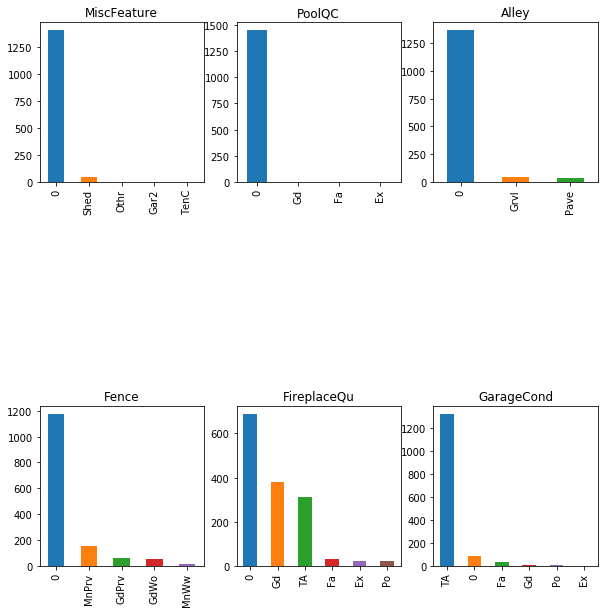

In [13]:
train_data['Alley'] = train_data['Alley'].fillna(0)
train_data['PoolQC'] = train_data['PoolQC'].fillna(0)
train_data['MiscFeature'] = train_data['MiscFeature'].fillna(0)
train_data['Fence'] = train_data['Fence'].fillna(0)
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(0)
train_data['GarageCond'] = train_data['GarageCond'].fillna(0)
train_data['GarageType'] = train_data['GarageType'].fillna(0)
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(0)
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(0)
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(0)
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(0)
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(0)

import pylab as plt

plt.rc('figure', figsize=(10, 4))
figsize_with_subplots = (10, 10)

bin_size = 10
fig = plt.figure(figsize = figsize_with_subplots)
fig_dims = (3, 3)

plt.subplot2grid(fig_dims, (0,0))
train_data['MiscFeature'].value_counts().plot(kind='bar', title='MiscFeature')

plt.subplot2grid(fig_dims, (0,1))
train_data['PoolQC'].value_counts().plot(kind='bar', title='PoolQC')

plt.subplot2grid(fig_dims, (0,2))
train_data['Alley'].value_counts().plot(kind='bar', title='Alley')

plt.subplot2grid(fig_dims, (2,0))
train_data['Fence'].value_counts().plot(kind='bar', title='Fence')

plt.subplot2grid(fig_dims, (2,1))
train_data['FireplaceQu'].value_counts().plot(kind='bar', title='FireplaceQu')

plt.subplot2grid(fig_dims, (2,2))
train_data['GarageCond'].value_counts().plot(kind='bar', title='GarageCond')


In [14]:
train_data.drop(to_be_removed, axis = 1, inplace = True)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [16]:
train_data.shape

(1460, 64)

In [17]:
train_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [19]:
quality_mapping = {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2, 'Po':1, 'NA':0}

In [21]:
for c in train_data.columns:
    if train_data[c].dtype == 'object':
        print (c, train_data[c].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [23]:
for c in train_data.columns:
    if train_data[c].dtype == 'object' and any(x in train_data[c].unique() for x in quality_mapping):
        print (c, train_data[c].unique())
        train_data[c] = train_data[c].map(quality_mapping)

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']


In [24]:
train_data.ExterCond

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      4
25      3
26      3
27      3
28      3
29      3
       ..
1430    3
1431    3
1432    3
1433    3
1434    3
1435    4
1436    3
1437    3
1438    3
1439    3
1440    3
1441    3
1442    3
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    3
1450    3
1451    3
1452    3
1453    3
1454    3
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [26]:
train_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [27]:
train_data.BsmtQual

0       4.0
1       4.0
2       4.0
3       3.0
4       4.0
5       4.0
6       5.0
7       4.0
8       3.0
9       3.0
10      3.0
11      5.0
12      3.0
13      4.0
14      3.0
15      3.0
16      3.0
17      NaN
18      3.0
19      3.0
20      5.0
21      3.0
22      4.0
23      4.0
24      3.0
25      4.0
26      3.0
27      5.0
28      3.0
29      3.0
       ... 
1430    4.0
1431    4.0
1432    3.0
1433    4.0
1434    3.0
1435    3.0
1436    3.0
1437    5.0
1438    3.0
1439    3.0
1440    5.0
1441    4.0
1442    5.0
1443    3.0
1444    4.0
1445    3.0
1446    3.0
1447    4.0
1448    2.0
1449    4.0
1450    4.0
1451    4.0
1452    4.0
1453    4.0
1454    4.0
1455    4.0
1456    4.0
1457    3.0
1458    3.0
1459    3.0
Name: BsmtQual, Length: 1460, dtype: float64

In [28]:
train_data.BsmtQual.isnull().sum()

37

In [29]:
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(0)

In [30]:
train_data.BsmtQual.isnull().sum()

0

In [31]:
train_data.columns[train_data.isnull().any()]

Index(['Electrical'], dtype='object')

In [32]:
mode = train_data.Electrical.mode()[0]
train_data['Electrical'] = train_data['Electrical'].fillna(mode)

In [33]:
train_data.Electrical.isnull().sum()

0

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [36]:
for c in train_data.columns[train_data.dtypes == 'object']:
    print (c)
    feature_char = sorted(train_data[c].unique())
    count = 1
    mapping = dict()
    for key in feature_char:
        mapping[key] = count
        count += 1
    print (mapping)
    train_data[c] = train_data[c].map(mapping)

MSZoning
{'C (all)': 1, 'FV': 2, 'RH': 3, 'RL': 4, 'RM': 5}
Street
{'Grvl': 1, 'Pave': 2}
LotShape
{'IR1': 1, 'IR2': 2, 'IR3': 3, 'Reg': 4}
LandContour
{'Bnk': 1, 'HLS': 2, 'Low': 3, 'Lvl': 4}
Utilities
{'AllPub': 1, 'NoSeWa': 2}
LotConfig
{'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4, 'Inside': 5}
LandSlope
{'Gtl': 1, 'Mod': 2, 'Sev': 3}
Neighborhood
{'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NPkVill': 14, 'NWAmes': 15, 'NoRidge': 16, 'NridgHt': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25}
Condition1
{'Artery': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, 'PosN': 5, 'RRAe': 6, 'RRAn': 7, 'RRNe': 8, 'RRNn': 9}
Condition2
{'Artery': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, 'PosN': 5, 'RRAe': 6, 'RRAn': 7, 'RRNn': 8}
BldgType
{'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'Twnhs': 4, 'TwnhsE': 5

In [37]:
train_data.MSZoning

0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       5
9       4
10      4
11      4
12      4
13      4
14      4
15      5
16      4
17      4
18      4
19      4
20      4
21      5
22      4
23      5
24      4
25      4
26      4
27      4
28      4
29      5
       ..
1430    4
1431    4
1432    4
1433    4
1434    4
1435    4
1436    4
1437    4
1438    5
1439    4
1440    4
1441    5
1442    2
1443    4
1444    4
1445    4
1446    4
1447    4
1448    4
1449    5
1450    4
1451    4
1452    5
1453    4
1454    2
1455    4
1456    4
1457    4
1458    4
1459    4
Name: MSZoning, Length: 1460, dtype: int64

In [38]:
all(train_data.dtypes == 'object')

False

In [39]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,8450,2,4,4,1,5,1,...,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,9600,2,4,4,1,3,1,...,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,11250,2,1,4,1,5,1,...,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,9550,2,1,4,1,1,1,...,272,0,0,0,0,2,2006,9,1,140000
4,5,60,4,14260,2,1,4,1,3,1,...,0,0,0,0,0,12,2008,9,5,250000
5,6,50,4,14115,2,1,4,1,5,1,...,0,320,0,0,700,10,2009,9,5,143000
6,7,20,4,10084,2,4,4,1,5,1,...,0,0,0,0,0,8,2007,9,5,307000
7,8,60,4,10382,2,1,4,1,1,1,...,228,0,0,0,350,11,2009,9,5,200000
8,9,50,5,6120,2,4,4,1,5,1,...,205,0,0,0,0,4,2008,9,1,129900
9,10,190,4,7420,2,4,4,1,1,1,...,0,0,0,0,0,1,2008,9,5,118000


In [40]:
train_data.corr()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
LotShape,0.032122,0.119289,0.061887,-0.165315,-0.010224,1.000000,0.085434,-0.036101,0.221102,-0.099951,...,0.078213,-0.036459,-0.053054,-0.020051,-0.042061,-0.033455,0.036449,-0.000911,-0.038118,-0.255580
LandContour,-0.019659,-0.002940,-0.017854,-0.149083,0.115995,0.085434,1.000000,0.008238,-0.025527,-0.374267,...,-0.058742,-0.021404,0.003836,-0.013098,0.020912,-0.011599,0.020507,-0.025754,0.033809,0.015453
Utilities,0.013324,-0.022844,-0.001192,0.010123,0.001682,-0.036101,0.008238,1.000000,-0.032589,-0.005909,...,-0.009407,-0.003046,0.102365,-0.001798,-0.002296,-0.051552,0.023353,-0.126770,-0.089701,-0.014314
LotConfig,0.049756,0.075910,-0.009895,-0.121161,0.013960,0.221102,-0.025527,-0.032589,1.000000,-0.007256,...,-0.070429,-0.030479,-0.004657,-0.046798,-0.018427,0.018902,-0.005992,0.014325,0.051579,-0.067396
LandSlope,0.005847,-0.025672,-0.022055,0.436868,-0.179360,-0.099951,-0.374267,-0.005909,-0.007256,1.000000,...,-0.008843,0.008694,0.052976,-0.015505,-0.003518,0.007072,-0.002305,0.054858,-0.043095,0.051152


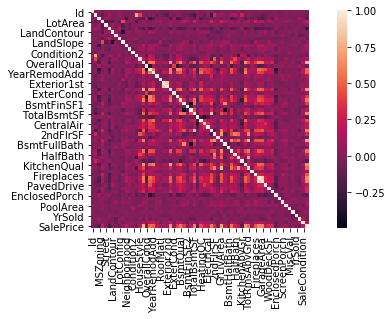

In [41]:
corrmat = train_data.corr()
sb.heatmap(corrmat, vmax=1, square=True)

In [42]:
k=15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'],
      dtype='object')

In [43]:
cm = np.corrcoef(train_data[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.68263924, 0.65959972,
        0.6404092 , 0.62343144, 0.61358055, 0.60585218, 0.5852072 ,
        0.56066376, 0.53372316, 0.52289733, 0.50710097, 0.46692884],
       [0.7909816 , 1.        , 0.59300743, 0.72627849, 0.67333078,
        0.60067072, 0.56202176, 0.5378085 , 0.47622383, 0.62937911,
        0.55059971, 0.42745234, 0.57232277, 0.55068392, 0.39676504],
       [0.70862448, 0.59300743, 1.        , 0.43598606, 0.42056275,
        0.46724742, 0.46899748, 0.4548682 , 0.56602397, 0.32795563,
        0.63001165, 0.82548937, 0.19900971, 0.28738852, 0.46167913],
       [0.68263924, 0.72627849, 0.43598606, 1.        , 0.7161222 ,
        0.52639018, 0.49577762, 0.47057956, 0.39783537, 0.56555809,
        0.48394942, 0.29790278, 0.59816048, 0.58731839, 0.24933461],
       [0.65959972, 0.67333078, 0.42056275, 0.7161222 , 1.        ,
        0.50980961, 0.48960558, 0.43262962, 0.38702729, 0.51093804,
        0.43464802, 0.28727854, 0.53016534, 

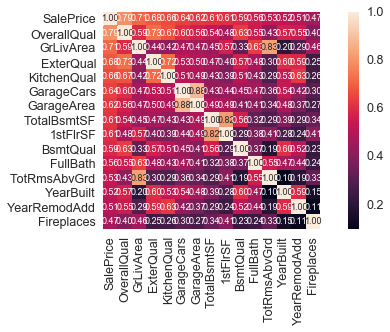

In [44]:
sb.set(font_scale = 1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':9}, yticklabels=cols.values, xticklabels=cols.values)

In [45]:
best_features = train_data.corr().nlargest(30, 'SalePrice')['SalePrice'].index
best_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'HeatingQC', 'BsmtFinSF1', 'Foundation', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'HalfBath', 'LotArea', 'CentralAir', 'Electrical',
       'PavedDrive', 'BsmtFullBath', 'RoofStyle', 'BsmtUnfSF',
       'SaleCondition'],
      dtype='object')

In [46]:
new_train = train_data[best_features]
new_train

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
0,208500,7,1710,4,4,2,548,856,856,4.0,...,61,1,8450,2,5,3,1,2,150,5
1,181500,6,1262,3,3,2,460,1262,1262,4.0,...,0,0,9600,2,5,3,0,2,284,5
2,223500,7,1786,4,4,2,608,920,920,4.0,...,42,1,11250,2,5,3,1,2,434,5
3,140000,7,1717,3,4,3,642,756,961,3.0,...,35,0,9550,2,5,3,1,2,540,1
4,250000,8,2198,4,4,3,836,1145,1145,4.0,...,84,1,14260,2,5,3,1,2,490,5
5,143000,5,1362,3,3,2,480,796,796,4.0,...,30,1,14115,2,5,3,1,2,64,5
6,307000,8,1694,4,4,2,636,1686,1694,5.0,...,57,0,10084,2,5,3,1,2,317,5
7,200000,7,2090,3,3,2,484,1107,1107,4.0,...,204,1,10382,2,5,3,1,2,216,5
8,129900,7,1774,3,3,2,468,952,1022,3.0,...,0,0,6120,2,2,3,0,2,952,1
9,118000,5,1077,3,3,1,205,991,1077,3.0,...,4,0,7420,2,5,3,1,2,140,5


In [47]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
SalePrice        1460 non-null int64
OverallQual      1460 non-null int64
GrLivArea        1460 non-null int64
ExterQual        1460 non-null int64
KitchenQual      1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
BsmtQual         1460 non-null float64
FullBath         1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
Fireplaces       1460 non-null int64
HeatingQC        1460 non-null int64
BsmtFinSF1       1460 non-null int64
Foundation       1460 non-null int64
WoodDeckSF       1460 non-null int64
2ndFlrSF         1460 non-null int64
OpenPorchSF      1460 non-null int64
HalfBath         1460 non-null int64
LotArea          1460 non-null int64
CentralAir       1460 non-null int64
Ele

In [48]:
new_train.shape

(1460, 30)

In [49]:
new_train.describe()

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,3.39589,3.511644,1.767123,472.980137,1057.429452,1162.626712,3.489041,...,46.660274,0.382877,10516.828082,1.934932,4.682192,2.856164,0.425342,2.410274,567.240411,4.770548
std,79442.502883,1.382997,525.480383,0.57428,0.663760,0.747315,213.804841,438.705324,386.587738,0.876478,...,66.256028,0.502885,9981.264932,0.246731,1.051301,0.496592,0.518911,0.834998,441.866955,1.100854
min,34900.000000,1.000000,334.000000,2.00000,2.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,1300.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,129975.000000,5.000000,1129.500000,3.00000,3.000000,1.000000,334.500000,795.750000,882.000000,3.000000,...,0.000000,0.000000,7553.500000,2.000000,5.000000,3.000000,0.000000,2.000000,223.000000,5.000000
50%,163000.000000,6.000000,1464.000000,3.00000,3.000000,2.000000,480.000000,991.500000,1087.000000,4.000000,...,25.000000,0.000000,9478.500000,2.000000,5.000000,3.000000,0.000000,2.000000,477.500000,5.000000
75%,214000.000000,7.000000,1776.750000,4.00000,4.000000,2.000000,576.000000,1298.250000,1391.250000,4.000000,...,68.000000,1.000000,11601.500000,2.000000,5.000000,3.000000,1.000000,2.000000,808.000000,5.000000
max,755000.000000,10.000000,5642.000000,5.00000,5.000000,4.000000,1418.000000,6110.000000,4692.000000,5.000000,...,547.000000,2.000000,215245.000000,2.000000,5.000000,3.000000,3.000000,6.000000,2336.000000,6.000000


In [50]:
npdf = new_train.values

In [51]:
ytrain = npdf[:,0]

In [52]:
xtrain = npdf[:,1:]

In [53]:
xtrain.shape

(1460, 29)

In [54]:
ytrain.shape

(1460,)

In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
new_train['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [57]:
regr.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [58]:
xpred = regr.predict(xtrain)
xpred

array([222887.6486694 , 176358.92519273, 227662.47243067, ...,
       250575.84265411, 149369.77899352, 164495.51972364])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1)

In [60]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
regr.score(X_test, y_test)

0.8303503108164896

In [62]:
from sklearn.linear_model import perceptron
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net

Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [63]:
net.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [64]:
net.score(X_test, y_test)

0.00821917808219178

In [65]:
net.predict(X_test)

array([113000.,  55000., 113000., 113000., 113000., 235000., 113000.,
       113000., 113000., 128900., 113000., 113000., 113000., 113000.,
       128900., 113000., 113000., 113000., 113000., 113000., 113000.,
       113000., 128900., 128900., 113000., 148800., 113000., 113000.,
       239000., 175000., 113000., 175000., 113000., 113000., 128900.,
       128900., 113000., 113000.,  55000., 113000., 113000., 113000.,
       113000., 113000., 113000., 128900., 113000., 113000., 113000.,
       113000., 113000., 239000., 113000., 113000., 113000., 113000.,
       113000., 148800., 113000., 113000., 113000., 113000., 113000.,
       113000., 113000., 113000., 113000., 113000., 113000., 113000.,
       113000., 113000., 235000., 113000., 113000., 113000., 113000.,
       113000., 128900., 113000., 113000., 113000., 113000., 113000.,
       113000., 113000., 148800., 113000., 113000., 113000., 113000.,
       113000., 113000., 113000., 113000., 113000., 113000., 113000.,
       113000., 1130

In [66]:
net.score(X_test, y_test)

0.00821917808219178

In [67]:
y_test

array([231500., 179500., 122000.,  84500., 142000., 325624., 285000.,
       151000., 195000., 275000., 175000.,  61000., 174000., 385000.,
       230000.,  87000., 125000.,  98600., 260000., 143000., 124000.,
       122500., 236500., 337500.,  76000., 187000., 128000., 179000.,
       485000., 122500., 106000., 118000., 127000.,  80000., 153000.,
       360000., 132000.,  85500., 262280., 112000., 131000., 139000.,
        87000., 135000., 181000., 163500., 116900., 159895., 244600.,
       294000.,  97000., 295000., 120500., 239500., 194000., 115000.,
       119500., 180000., 118000., 178000., 167000., 267000.,  82000.,
       133900., 167000., 132500., 135000., 248000., 160000., 144500.,
       200500., 113000., 354000., 164000., 170000., 224000., 163900.,
       160000., 466500., 172500., 193500., 133000., 137000., 167500.,
       196500., 146000., 159500., 158000., 189000., 172500., 194201.,
       181000., 115000., 101800., 100000., 139000., 115000., 139000.,
       156000., 1580

In [68]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(30))
mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [69]:
mlpr.score(X_test, y_test)

0.48453234416991575

In [70]:
mlpr.predict(X_test)

array([193885.27351101, 179027.84946606, 147594.82752532,  90891.31072374,
       175412.62931091, 225588.66471752, 222861.38003355, 127551.61910326,
       194920.25438703, 204963.50442139, 198303.02422568, 136480.15150021,
       163468.94735699, 329833.30587191, 199283.33498731, 156632.24579317,
       137433.66354523, 169268.4363063 , 224434.87451339, 145168.62045413,
       149523.89753043, 198069.96363488, 181905.12644305, 219865.91155581,
       139401.20324478, 184083.74173576, 145834.99467049, 180546.89231855,
       276208.06816603, 130859.12257533, 184033.60549978, 117339.63606198,
       141037.04184429, 147006.25404874, 173637.50562703, 233617.93251335,
       147982.29283669, 118362.83251854, 228227.6535829 , 162563.44191009,
       175860.99793221, 165596.66126748, 124675.69334838, 150920.17083172,
       175939.04672606, 204780.11740282, 132223.17501837, 145931.01906723,
       200360.78524104, 211562.58836453, 127930.91066212, 287518.95554901,
       140170.87354838, 1

In [71]:
mlpr = MLPRegressor(hidden_layer_sizes=(30))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.341707139682497

In [72]:
mlpr = MLPRegressor(hidden_layer_sizes=(50))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.5469802216756408

In [73]:
mlpr = MLPRegressor(hidden_layer_sizes=(60))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.5797266183356615

In [74]:
mlpr = MLPRegressor(hidden_layer_sizes=(80))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.6150116387834206

In [75]:
mlpr = MLPRegressor(hidden_layer_sizes=(100))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.6217898175034826

In [76]:
mlpr = MLPRegressor(hidden_layer_sizes=(110))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.6212483241764836

In [77]:
mlpr = MLPRegressor(hidden_layer_sizes=(15, 30, 10))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.73574622261922

In [78]:
mlpr = MLPRegressor(hidden_layer_sizes=(100, 50))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.753623903729681

# RANDOM FOREST CLASSIFIER


In [79]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
rfr.score(X_test, y_test)

0.8480387501753767

In [81]:
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
rfr.n_estimators

10

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [84]:
ad.score(X_test, y_test)

0.010958904109589041

In [85]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
k.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
k.score(X_test, y_test)

0.010958904109589041

# plots

Text(0.5,1,'Scatter Plot')

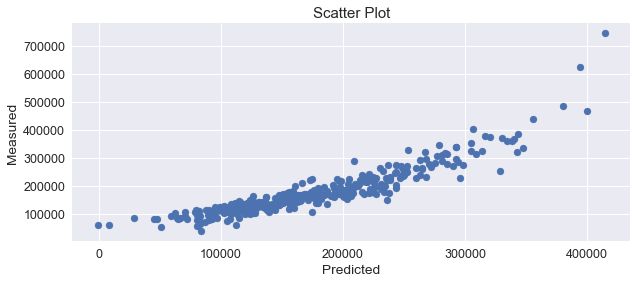

In [87]:
plt.scatter(regr.predict(X_test), y_test)
plt.xlabel("Predicted")
plt.ylabel("Measured")
plt.title("Scatter Plot")

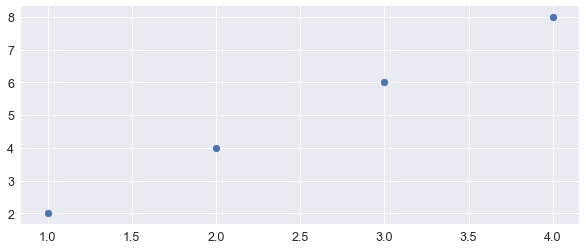

In [88]:
plt.scatter([1,2,3,4],[2,4,6,8])

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
ExterQual        1460 non-null int64
Exter

In [90]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# pre-processing the test data

In [91]:
best_features = list(best_features)
best_features.remove('SalePrice')

In [92]:
len(best_features)

29

In [93]:
test_data = pd.read_csv('test.csv')
new_test = test_data[best_features].copy()

In [94]:
best_features

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'HeatingQC',
 'BsmtFinSF1',
 'Foundation',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'CentralAir',
 'Electrical',
 'PavedDrive',
 'BsmtFullBath',
 'RoofStyle',
 'BsmtUnfSF',
 'SaleCondition']

Getting all rows having non-null values. For testing, we need not do any interpolation because our motive is not to train the model but to use it to predict clean test data-points.

In [95]:
new_test = new_test[new_test.notnull().sum(axis=1) == 29]

In [96]:
new_test.isnull().sum().sum()

0

In [97]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1458
Data columns (total 29 columns):
OverallQual      1413 non-null int64
GrLivArea        1413 non-null int64
ExterQual        1413 non-null object
KitchenQual      1413 non-null object
GarageCars       1413 non-null float64
GarageArea       1413 non-null float64
TotalBsmtSF      1413 non-null float64
1stFlrSF         1413 non-null int64
BsmtQual         1413 non-null object
FullBath         1413 non-null int64
TotRmsAbvGrd     1413 non-null int64
YearBuilt        1413 non-null int64
YearRemodAdd     1413 non-null int64
Fireplaces       1413 non-null int64
HeatingQC        1413 non-null object
BsmtFinSF1       1413 non-null float64
Foundation       1413 non-null object
WoodDeckSF       1413 non-null int64
2ndFlrSF         1413 non-null int64
OpenPorchSF      1413 non-null int64
HalfBath         1413 non-null int64
LotArea          1413 non-null int64
CentralAir       1413 non-null object
Electrical       1413 non-nu

# now convert from int to num

In [98]:
quality_mapping

{'Ex': 5, 'Fa': 2, 'Gd': 4, 'NA': 0, 'Po': 1, 'TA': 3}

In [99]:
for c in new_test.columns:
    if new_test[c].dtype == 'object' and any(x in new_test[c].unique() for x in quality_mapping):
        print (c, new_test[c].unique())
        new_test[c] = new_test[c].map(quality_mapping)

ExterQual ['TA' 'Gd' 'Ex' 'Fa']
KitchenQual ['TA' 'Gd' 'Ex' 'Fa']
BsmtQual ['TA' 'Gd' 'Ex' 'Fa']
HeatingQC ['TA' 'Gd' 'Ex' 'Fa' 'Po']


In [100]:
new_test.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
0,5,896,3,3,1.0,730.0,882.0,896,3,1,...,0,0,11622,Y,SBrkr,Y,0.0,Gable,270.0,Normal
1,6,1329,3,4,1.0,312.0,1329.0,1329,3,1,...,36,1,14267,Y,SBrkr,Y,0.0,Hip,406.0,Normal
2,5,1629,3,3,2.0,482.0,928.0,928,4,2,...,34,1,13830,Y,SBrkr,Y,0.0,Gable,137.0,Normal
3,6,1604,3,4,2.0,470.0,926.0,926,3,2,...,36,1,9978,Y,SBrkr,Y,0.0,Gable,324.0,Normal
4,8,1280,4,4,2.0,506.0,1280.0,1280,4,2,...,82,0,5005,Y,SBrkr,Y,0.0,Gable,1017.0,Normal


In [101]:
for c in new_test.columns[new_test.dtypes == 'object']:
    print (c)
    feature_char = sorted(new_test[c].unique())
    count = 1
    mapping = dict()
    for key in feature_char:
        mapping[key]=count
        count += 1
    print (mapping)
    new_test[c] = new_test[c].map(mapping)

Foundation
{'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Stone': 4, 'Wood': 5}
CentralAir
{'N': 1, 'Y': 2}
Electrical
{'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'SBrkr': 4}
PavedDrive
{'N': 1, 'P': 2, 'Y': 3}
RoofStyle
{'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed': 6}
SaleCondition
{'Abnorml': 1, 'AdjLand': 2, 'Alloca': 3, 'Family': 4, 'Normal': 5, 'Partial': 6}


In [102]:
new_test.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
0,5,896,3,3,1.0,730.0,882.0,896,3,1,...,0,0,11622,2,4,3,0.0,2,270.0,5
1,6,1329,3,4,1.0,312.0,1329.0,1329,3,1,...,36,1,14267,2,4,3,0.0,4,406.0,5
2,5,1629,3,3,2.0,482.0,928.0,928,4,2,...,34,1,13830,2,4,3,0.0,2,137.0,5
3,6,1604,3,4,2.0,470.0,926.0,926,3,2,...,36,1,9978,2,4,3,0.0,2,324.0,5
4,8,1280,4,4,2.0,506.0,1280.0,1280,4,2,...,82,0,5005,2,4,3,0.0,2,1017.0,5


Now our columns in the test data must be in the same order as the train

In [103]:
new_train.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'HeatingQC', 'BsmtFinSF1', 'Foundation', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'HalfBath', 'LotArea', 'CentralAir', 'Electrical',
       'PavedDrive', 'BsmtFullBath', 'RoofStyle', 'BsmtUnfSF',
       'SaleCondition'],
      dtype='object')

Loading test dataset on the basis of best features took care of that.

In [104]:
test_predictions = rfr.predict(new_test)
test_predictions

array([121861. , 156085. , 182000. , ..., 170150. , 128145. , 238667.8])

<Container object of 1413 artists>

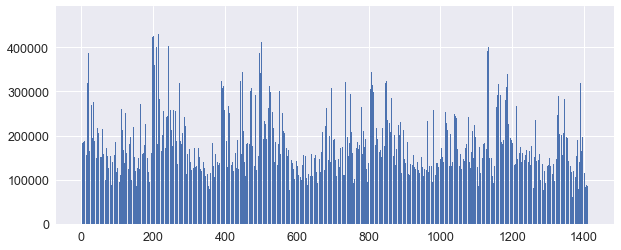

In [105]:
plt.bar(range(1, test_predictions.shape[0]+1), test_predictions)

Checking the validation accuracy with 15 features

In [106]:
features15 = train_data.corr().nlargest(16, 'SalePrice')['SalePrice'].index
new_train15 = train_data[features15]

In [107]:
features15

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'HeatingQC'],
      dtype='object')

Predictions : [214240.         185380.         119530.          85050.
 151840.         354463.5        315719.         145266.4
 219700.         218685.         171900.          84800.
 210915.6        252043.2        242454.9        114350.
 114410.         159040.         161685.9        131375.
 120690.         100243.2        282310.         319605.7
 111530.         176804.         130080.         185340.
 530776.8        140865.         114670.         117650.
 120820.          95480.         170020.         346884.6
 119825.          85780.         268240.         108860.
 147354.         155000.         104720.         125000.
 179520.         205690.         135420.         177908.5
 276002.2        235750.         105130.         305285.1
 119305.         245876.7        201180.         109450.
 120800.         165730.         130495.         191605.
 148480.         300881.3        105955.         130840.
 162430.         132225.         139000.4        210716.5
 149123.7  

<Container object of 365 artists>

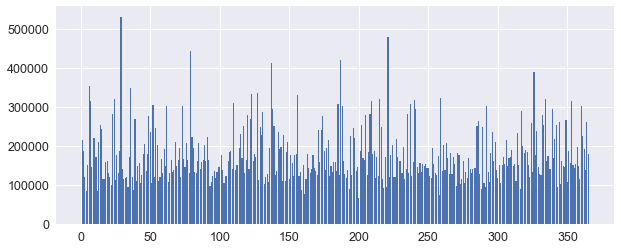

In [109]:
npdf15 = new_train15.values
xtrain15 = npdf15[:,1:]
ytrain15 = npdf15[:,0]
X_train15, X_test15, y_train15, y_test15 = train_test_split(xtrain15, ytrain15, test_size=0.25, random_state=1)
rfr15 = RandomForestRegressor()
rfr15.fit(X_train15, y_train15)
pred15 = rfr15.predict(X_test15)
sc15 = rfr15.score(X_test15,y_test15)
rms15 = np.sqrt(mean_squared_error(np.log1p(y_test15),np.log1p(pred15)))
print ("Predictions : {}\nScore : {}\nRMS : {}".format(pred15,sc15,rms15))
plt.bar(range(1,pred15.shape[0]+1),pred15)

Predictions : [214870.  152500.  119680.   81250.  156110.  346509.4 316365.8 145095.8
 219950.  213600.  175505.   90640.  205535.8 370913.4 234374.8 114600.
 114590.  150310.  169750.  126590.  123050.  127480.  275516.1 297158.9
 104050.  182420.  115780.  192140.  493451.1 131000.  118810.  107350.
 122260.   87890.  139645.9 326199.  124660.   92140.  271868.6  99050.
 140910.  149107.5  88020.4 119270.  176290.  184695.  145625.  174287.5
 261582.  250308.7  98570.  285574.  117280.  228810.  199650.8 102970.
 119900.  162700.  128112.5 179344.  155295.  288281.3 109490.8 131230.
 187500.  130030.  145163.4 209459.  148150.  155090.  160940.  139400.9
 320130.  148470.  148850.  211249.8 163900.  126070.  415817.7 211045.6
 191600.  149843.4 138430.  153090.  186270.  153230.  166980.  169280.
 212885.  156875.  210778.7 160270.  101860.  107355.  126280.  127310.
 121280.  134970.  143820.  143890.  188640.  134842.  100480.  115330.
 123265.  154640.  185499.6 161690.  133998.7

<Container object of 365 artists>

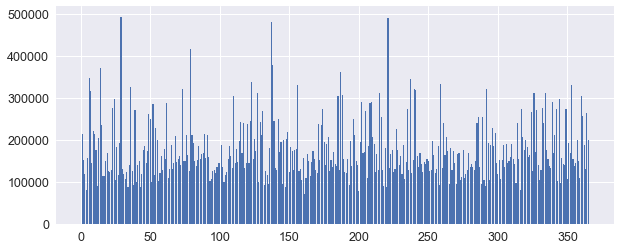

In [110]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
rfr30 = RandomForestRegressor()
rfr30.fit(X_train30,y_train30)
sc30 = rfr30.score(X_test30,y_test30)
pred30 = rfr30.predict(X_test30)
rms30 = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(pred30)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(pred30,sc30,rms30))
plt.bar(range(1,pred30.shape[0]+1),pred30)

Predictions : [214870.  152500.  119680.   81250.  156110.  346509.4 316365.8 145095.8
 219950.  213600.  175505.   90640.  205535.8 370913.4 234374.8 114600.
 114590.  150310.  169750.  126590.  123050.  127480.  275516.1 297158.9
 104050.  182420.  115780.  192140.  493451.1 131000.  118810.  107350.
 122260.   87890.  139645.9 326199.  124660.   92140.  271868.6  99050.
 140910.  149107.5  88020.4 119270.  176290.  184695.  145625.  174287.5
 261582.  250308.7  98570.  285574.  117280.  228810.  199650.8 102970.
 119900.  162700.  128112.5 179344.  155295.  288281.3 109490.8 131230.
 187500.  130030.  145163.4 209459.  148150.  155090.  160940.  139400.9
 320130.  148470.  148850.  211249.8 163900.  126070.  415817.7 211045.6
 191600.  149843.4 138430.  153090.  186270.  153230.  166980.  169280.
 212885.  156875.  210778.7 160270.  101860.  107355.  126280.  127310.
 121280.  134970.  143820.  143890.  188640.  134842.  100480.  115330.
 123265.  154640.  185499.6 161690.  133998.7

<Container object of 365 artists>

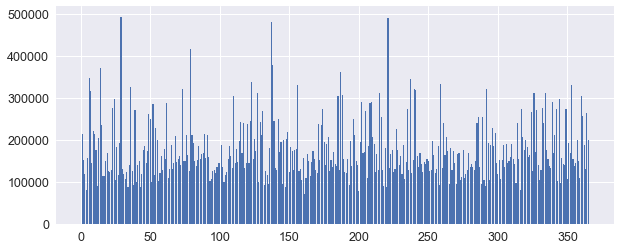

In [111]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
regr30 = linear_model.LinearRegression()
regr30.fit(X_train30,y_train30)
regrsc30 = regr30.score(X_test30,y_test30)
regrpred30 = rfr30.predict(X_test30)
regrrms30 = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(regrpred30)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(regrpred30,regrsc30,regrrms30))
print ("Model: Linear Regression")
plt.bar(range(1,regrpred30.shape[0]+1),regrpred30)

Predictions : [197925.28413502 189177.10775707 115041.37606558  54093.96743927
 168099.57299295 295012.52374288 256144.21866568 130135.31609999
 193330.67444735 229744.85858943 213444.74088402  88145.1238831
 201374.00692505 287848.58238217 254625.60458738 128820.72749037
 108823.43720561 165760.6962436  212613.47894713 120075.47831035
 115749.18596314 210781.17222163 247053.71289859 264977.45006687
 101563.85826625 199615.58978614 137196.16121774 183911.02815642
 354415.29604943 162083.14141244 202503.04817963 119941.9226191
 113776.00347118 107553.69128406 183914.61187677 292537.8287263
 123437.43343692  67842.00968112 281535.78652945 137671.94017365
 156180.46493594 151868.37371001  99550.11457632 125795.64888486
 181219.42581936 223529.8630307  108326.23786733 158683.63449853
 231218.28406605 211422.73461114  70938.07002794 362156.76432726
 135985.44007209 223480.24163079 192820.55834167  92980.62407093
 114829.80115581 138605.79866633 134985.67791979 180929.69958296
 183528.467528

<Container object of 365 artists>

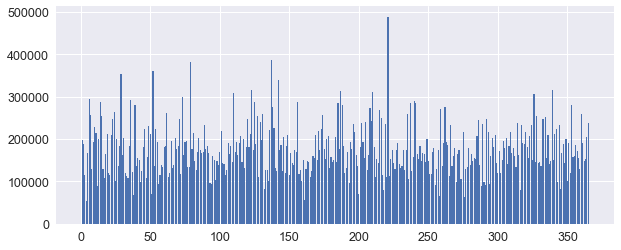

In [112]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(100,50))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print ("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print ("Model: MLPRegressor(hidden_layer_sizes=(100,50))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [202783.26896502 195862.05539749 134762.50936658  85988.15550727
 176766.77938171 270108.80827341 246713.32056943 147991.41264409
 201497.12910962 223253.07959671 210131.62414106 113256.824667
 194632.87874103 291252.74003884 237177.96361228 148955.92553109
 127885.33028065 174643.1430134  215631.5297725  138942.34101455
 138198.6257765  212650.69599869 227149.41411245 246413.70424948
 122981.96877791 201999.76250986 156135.9290663  187740.06082086
 320241.36382928 165809.68194698 206699.49786584 139798.90833423
 134788.05367429 127913.58694788 188105.55907023 266275.27592228
 143072.51829593  98572.81329817 263170.88200891 154530.29641429
 173034.60128561 165111.3718862  123059.47954802 142658.34661914
 190150.1975825  218955.7051331  132974.32285994 166924.47408685
 219522.31031879 206712.7142101   95612.44122956 329893.20753796
 147002.24471761 221385.3619687  191841.86155696 116789.75786883
 132808.42355923 157615.19420236 151843.22648228 189014.84927042
 186398.05646

<Container object of 365 artists>

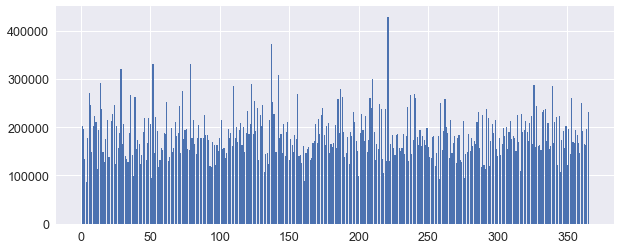

In [113]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(15,30,10))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model : MLPRegressor(hidden_layer_sizes=(15,30,10))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [199978.4761186  192556.65328331 138458.68999653  90682.7868991
 174752.91004621 256875.80031981 241783.67087891 140981.61441802
 200298.78398655 216786.11236317 206476.05476703 120735.01516026
 186189.96516843 286149.29501426 225750.43109745 153058.24498639
 131867.81609818 174113.49239925 212541.8161571  141174.68188979
 144105.05334854 209158.02282222 213122.74778067 237774.87879738
 127857.91196645 196184.87217444 153695.78491942 188694.96168149
 311424.80962585 153471.72564037 202157.45938907 132419.37623777
 136777.32584604 131901.06089978 183734.97071779 257753.04799385
 145218.66644188 105834.97740836 254400.1784667  155233.8988555
 174458.07310302 167033.67200078 125056.37563266 143569.91580305
 187948.28321492 216069.6663905  134499.6440409  162154.53963343
 215024.65419894 209271.60262614 100490.80948865 318863.12849662
 141305.04851806 217030.09954029 188752.11428784 121869.51248203
 137671.00440966 153985.04212039 152416.48971812 186054.08233053
 190056.91458

<Container object of 365 artists>

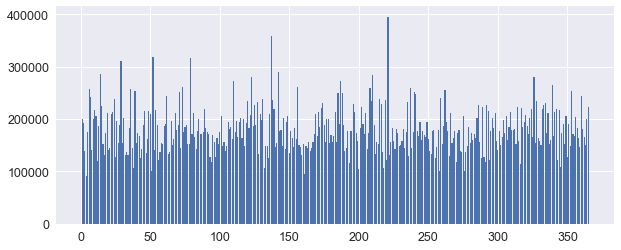

In [114]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(110))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model: MLPRegressor(hidden_layer_sizes=(110))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [200063.82274812 191923.04470098 142469.99283665  95045.57946651
 175730.63447064 252366.52259116 239994.98246263 142612.48432377
 200779.4700515  214555.11386895 205957.22528506 125493.94268227
 186247.87181688 281899.43040575 223585.33100069 156128.36645656
 135991.75303794 175929.40061564 211245.0737459  144636.93885585
 147826.90938508 207867.98047295 210128.82758551 235330.61324752
 133107.80858547 195140.95719398 155751.31994285 191161.69232832
 307101.79774888 152195.94923406 201462.41143743 133615.07246498
 140865.459317   136012.76285245 183791.76579407 254205.47425974
 148462.39386308 111491.24961616 250170.0214361  157911.71628923
 175687.09736254 169314.46353473 129423.53919843 147546.62289105
 189148.75193527 214791.71904491 138067.01874521 164120.7504009
 215916.80043479 207541.4009124  105531.02405416 311755.52590397
 144124.57004323 215649.61486142 190861.61457633 126929.1267586
 141406.33033204 155679.50109403 154528.76366795 186917.83074765
 191626.89835

<Container object of 365 artists>

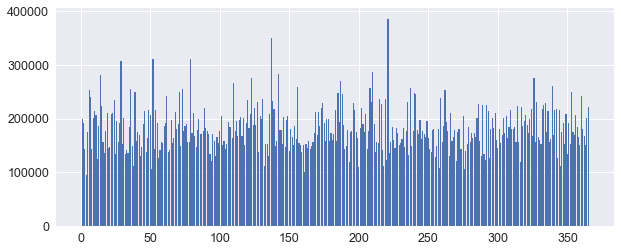

In [115]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(100))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model : MLPRegressor(hidden_layer_sizes=(100))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [199533.34535326 192094.26460135 143324.23273745  97244.97684214
 175772.93571706 250860.21239095 238917.08910749 141708.61671394
 200351.57576637 214171.90111306 205563.53590339 127226.28641643
 184639.84408747 280758.06568573 222436.20781247 156842.87706024
 137014.32138043 176078.53348344 210879.09136655 145329.74818722
 148982.73090572 207931.09276439 207928.40053155 234173.56891996
 133977.75465984 194647.08611443 155944.56022893 191054.04121691
 305483.75968208 150226.69083692 201359.80355725 132615.76496488
 141472.67124531 136821.64559071 183533.12731583 252915.26473061
 149068.77046101 113540.26212158 248823.62271928 158295.52833928
 176557.28738906 169773.75871735 130115.55685991 147939.58576677
 188603.08638216 214606.89204228 138327.69171131 163289.98719723
 214849.32016943 208651.89198271 108046.85265621 309580.51763457
 143734.34033599 214855.63479991 190200.69218507 127902.74277623
 142528.8467325  155999.44003003 155321.44708782 186754.44305549
 192316.028

<Container object of 365 artists>

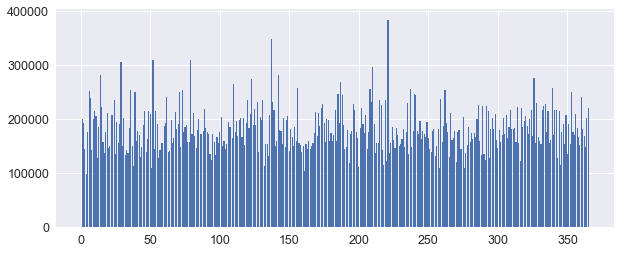

In [116]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(80))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [197957.84505404 188888.94614278 145872.51022591  98963.73969729
 176215.10937739 244244.54696347 234595.59170319 142434.72563421
 198673.85080307 211391.14854094 203971.76692613 130714.84967975
 185234.195535   288143.78824973 218882.56921621 157640.74862565
 139254.65043628 175786.17197906 212683.39279758 146726.47151067
 150084.67336276 205250.55186709 205061.97651404 230794.78187898
 137692.62042231 191499.23154197 156097.36374615 191354.05257448
 298540.21488534 150072.20547256 198305.80171751 133219.70599819
 143242.34573687 140274.59237007 181634.95509704 247887.12266361
 150118.16706509 116883.33152921 242150.1444044  160188.83076994
 176557.69589267 169862.79442617 132343.04637418 150902.56150534
 187502.37633644 212075.45270512 139713.37551907 164280.71505118
 214259.60350827 208617.96588264 114571.88508647 301672.93052872
 145479.01435142 210575.57671    190754.21737274 130490.55718399
 145025.69035963 155618.63355563 155887.28056202 185275.61774325
 192232.311

<Container object of 365 artists>

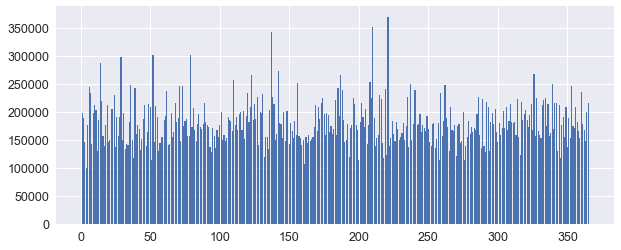

In [117]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(60))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [195841.36748062 183933.68065321 146581.94425041  93751.45437487
 175475.99577066 234555.21432866 229117.65665293 134833.50993454
 196907.63379398 207655.40732289 201037.01253559 133299.54747543
 174722.53604925 311255.10722529 208671.43833968 157059.28745148
 137821.67181461 172327.19208262 218830.27762114 145479.76292599
 149456.25404181 201593.65057724 192945.41449101 225214.25851471
 138675.48623327 187107.73161876 150728.43441532 186756.86762383
 288656.23967868 140153.19697653 191265.07428497 124699.18218585
 141719.49927766 143475.54358502 176905.05995712 240743.39772397
 148556.76374734 117225.6911516  234916.71971852 161256.27738784
 175910.51916083 167573.29079733 128273.28216156 150792.49194697
 181739.33976033 208225.99613914 135748.34185708 155071.2750763
 208495.79362008 209696.05158757 120799.55383741 295442.44137929
 142335.05690509 204810.16074468 186120.93054195 129150.18293893
 145541.20104934 153062.88008993 154491.69725974 181734.62389176
 189051.0948

<Container object of 365 artists>

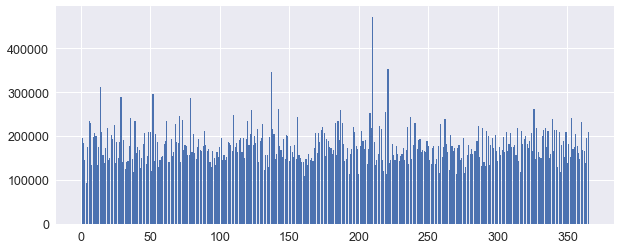

In [118]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(50))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)

Predictions : [194812.95458417 178091.21178915 147786.06674336  91573.98302103
 176732.70941257 226829.60141757 223101.95113764 129550.4605107
 195425.9360756  205993.12498749 198973.68696772 136102.99608861
 165876.41321252 348929.8795533  201585.47003026 156293.63780105
 136204.67794144 168610.85598896 230728.6078485  144254.02077942
 148334.73077061 197826.68630463 185276.7568044  220711.19938933
 139469.3348986  183028.61139328 146031.78190443 180705.0280177
 276563.77691906 133682.14959811 183932.15241963 119555.39664344
 139822.70298596 148328.03277481 172992.1132632  234104.40748583
 147083.48606837 115973.81068062 228185.91083128 162965.46674841
 175597.30221229 165032.89176624 125015.86017016 151210.15832997
 175612.31941563 205522.90316139 132154.77576029 147803.98581413
 201150.67873428 213642.72285676 128623.52308086 290004.05245513
 140119.04120255 198987.80232558 180214.41402048 126999.59477117
 146797.44693594 150276.59147619 153608.88962427 177348.71877477
 185211.72649

<Container object of 365 artists>

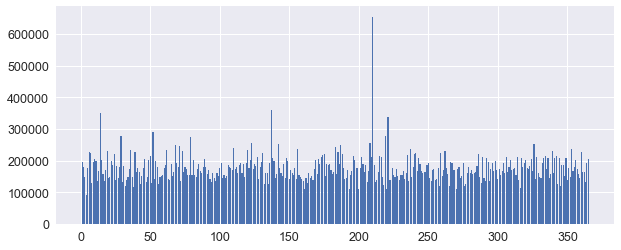

In [119]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(30))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model : MLPRegressor(hidden_layer_sizes=(30))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)